# Testando Outros Modelos Espanha

Neste notebook será testado outros modelo de séries temporais da Covid na Espanha, comparando os resultados com o modelo baseline feito na sprint 2.

In [ ]:
!pip install git+https://github.com/ourownstory/neural_prophet.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-ithb7ra4
  Running command git clone -q https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-ithb7ra4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando as Blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima.arima import auto_arima
from neuralprophet import NeuralProphet

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
serie_esp = pd.read_csv('Séries Temporais Espanha.csv')
serie_esp.drop('Unnamed: 0',axis=1,inplace=True)
serie_esp['Date'] = pd.to_datetime(serie_esp['Date'],format='%Y-%m-%d')
serie_esp.head()

,Date,Confirmed,Recovered,Deaths,Ano,Mês
0,2020-01-22,0,0.0,0,2020,1
1,2020-01-23,0,0.0,0,2020,1
2,2020-01-24,0,0.0,0,2020,1
3,2020-01-25,0,0.0,0,2020,1
4,2020-01-26,0,0.0,0,2020,1


In [ ]:
serie_esp.set_index('Date',inplace=True)
serie_esp.head()

,Confirmed,Recovered,Deaths,Ano,Mês
Date,,,,,
2020-01-22,0,0.0,0,2020,1
2020-01-23,0,0.0,0,2020,1
2020-01-24,0,0.0,0,2020,1
2020-01-25,0,0.0,0,2020,1
2020-01-26,0,0.0,0,2020,1


In [ ]:
treino = serie_esp[(serie_esp['Ano']<=2021)&(serie_esp['Mês']<12)]
teste = serie_esp[(serie_esp['Ano']==2021)&(serie_esp['Mês'] == 12)]

## Modelo

### PD Arima

In [ ]:
step1 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)


 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9425.297, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=9270.334, Time=0.17 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=7.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9236.084, Time=1.53 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=8.30 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=13.25 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=9423.546, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.60 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=4.78 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=9253.142, Time=0.53 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.94 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=7.97 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9

In [ ]:
step2 = auto_arima(serie_esp['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9723.692, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9483.810, Time=0.50 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=9681.990, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9451.028, Time=1.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=10.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9580.373, Time=2.14 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=9430.702, Time=4.73 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9483.217, Time=1.79 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=11.84 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=9430.016, Time=1.87 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=9484

In [ ]:
step1

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
step2

ARIMA(order=(6, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
step1.fit(treino['Deaths'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
step2.fit(treino['Deaths'])

ARIMA(order=(6, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast=step1.predict(n_periods=len(teste))

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

  return get_prediction_index(



In [ ]:
future_forecast1 = step2.predict(n_periods=len(teste))

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

  return get_prediction_index(



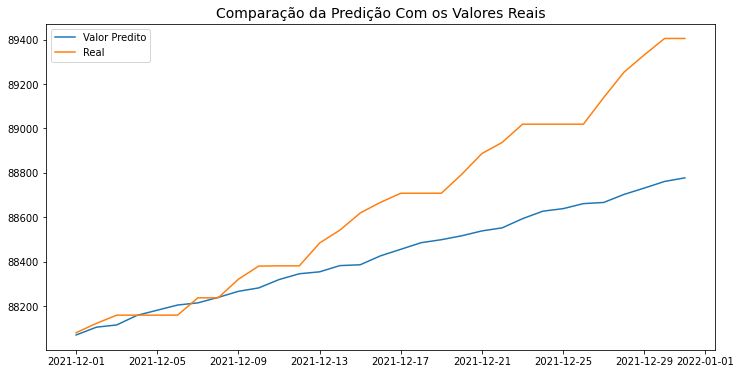

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast)
rmse = mean_squared_error(teste['Deaths'],future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 236.2358003126893
MAPE: 0.002654281784891738
RMSE: 310.2042301742621


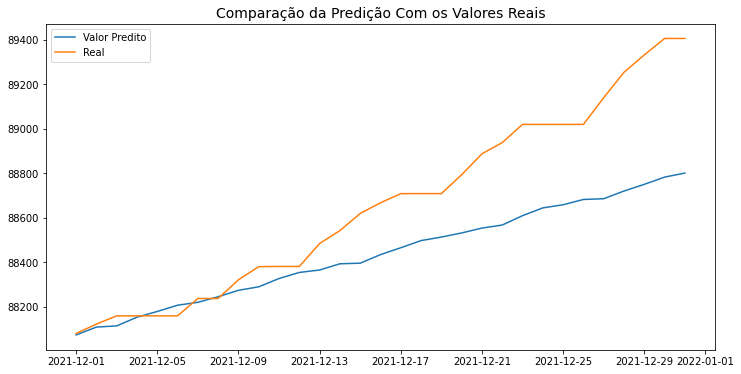

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast1,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast1)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast1)
rmse = mean_squared_error(teste['Deaths'],future_forecast1)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 225.83756423135844
MAPE: 0.002537357142051522
RMSE: 297.9976389419516


### Profhet

In [ ]:
serie2 = pd.read_csv('Séries Temporais Espanha.csv')
serie2 = serie2[['Date','Deaths']]
serie2.columns = ['ds','y']
serie2['ds'] = pd.to_datetime(serie2['ds'], format='%Y-%m-%d')
serie2.head()


,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
treino_re = serie2[:679]
teste_re = serie2[679:709]

In [ ]:
treino_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      679 non-null    datetime64[ns]
 1   y       679 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.7 KB


In [ ]:
treino_re.ds = treino_re.ds.astype(str)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



In [ ]:
m3 = NeuralProphet( num_hidden_layers=10, d_hidden=10, learning_rate=0.8, batch_size=29, epochs=30,)

In [ ]:
metrics = m3.fit(treino_re, freq='D') 

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True

Training: 0it [00:00, ?it/s]

In [ ]:

future = m3.make_future_dataframe(treino_re, periods=31)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast = m3.predict(future)
     

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 24it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast

,ds,y,yhat1,trend,season_weekly
0,2021-12-01,None,88648.906250,88774.515625,-125.608566
1,2021-12-02,None,89104.085938,88824.859375,279.227905
2,2021-12-03,None,89030.671875,88875.203125,155.470276
3,2021-12-04,None,89001.804688,88925.546875,76.251724
4,2021-12-05,None,88780.406250,88975.890625,-195.489655
5,2021-12-06,None,88846.492188,89026.234375,-179.746414
6,2021-12-07,None,89066.484375,89076.593750,-10.105262
7,2021-12-08,None,89001.328125,89126.937500,-125.608566
8,2021-12-09,None,89456.507812,89177.281250,279.227905
9,2021-12-10,None,89383.093750,89227.625000,155.470276


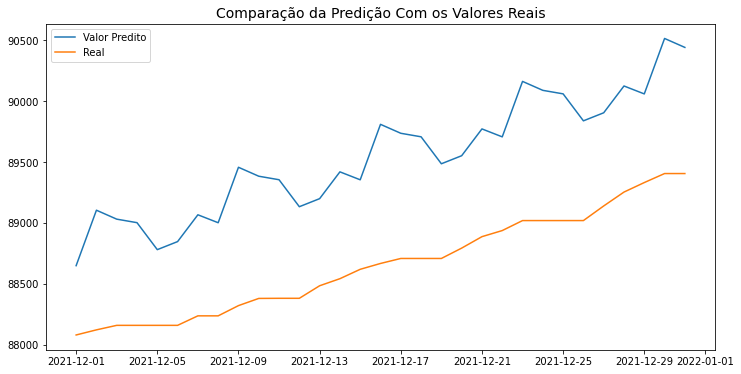

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,forecast['yhat1'],label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],forecast['yhat1'])
mape = mean_absolute_percentage_error(teste['Deaths'],forecast['yhat1'])
rmse = mean_squared_error(teste['Deaths'],forecast['yhat1'])

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 880.4153225806451
MAPE: 0.009927855608903994
RMSE: 894.4374275085992
